In [190]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split as split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score as score


In [191]:
data = load_diabetes()

In [192]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [193]:
x = data.data
y = data.target

In [194]:
train_x, test_x, train_y, test_y = split(x, y, test_size=0.2, random_state = 9)

In [195]:
linear_regression = LinearRegression()

In [196]:
linear_regression.fit(train_x, train_y)

LinearRegression()

In [197]:
y_prediction = linear_regression.predict(test_x)

In [198]:
score(y_prediction, test_y)

0.3322267793511652

In [199]:
ridge = Ridge()

In [200]:
ridge.fit(train_x, train_y)

Ridge()

In [201]:
y_prediction_2 = ridge.predict(test_x)

In [202]:
score(y_prediction_2, test_y)

-0.7809612700186894

In [203]:


def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

In [204]:
alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

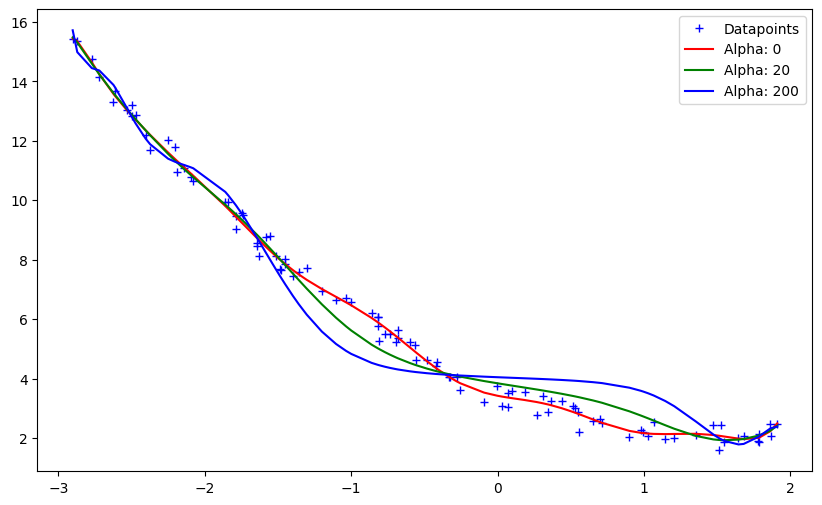

In [205]:
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()